Citiți un semnal audio și afișați în fereastra de comandă frecvența sa de eșantionare.

In [ ]:
import wave
import numpy as np
import librosa.core as lb
from scipy.signal import hamming
import matplotlib.pylab as pl
from scipy.signal import freqz

input_wav = 'speech_files/adr_rnd1_001.wav'
wav_struct = wave.open(input_wav, 'r')
sampling_frequency = wav_struct.getframerate()
wav_bytes = wav_struct.readframes(-1)
wav_data = np.frombuffer(wav_bytes, dtype='int16')
wav_data = wav_data/float(max(abs(wav_data)))
wav_struct.close()
print("frecventa de esantionare:")
print(sampling_frequency)

frecventa de esantionare:
16000


Determinați în funcție de frecvența de eșantionare a semnalului citit, numărul de eșantioane (N) corespunzător duratei de analiză de 30 ms.

In [ ]:
# Numărul de eșantioane dintr-un cadru de analiză de 30msec
N = int(30*1e-3*sampling_frequency)

print("Nr. esantioane dintr-un cadru de analiza de 30 ms:")
print (N)

Nr. esantioane dintr-un cadru de analiza de 30 ms:
480


Vizualizați semnalul pe cadre de lungime N. Folosiți o fereastră de tip Hamming.

<ipython-input-34-88b8bbdbb52d>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  pl.figure()


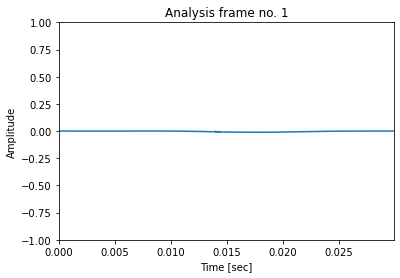

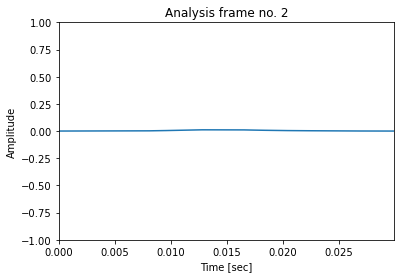

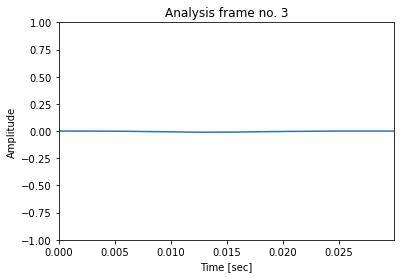

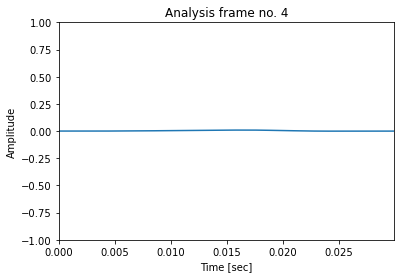

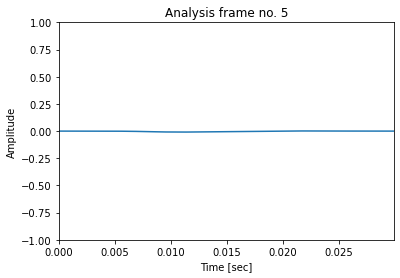

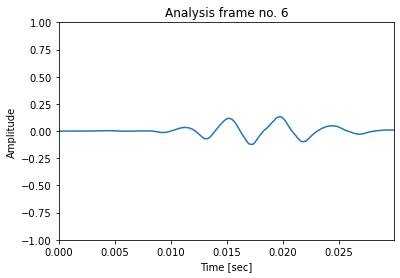

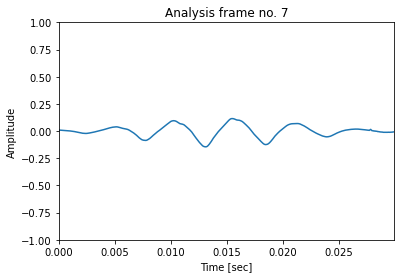

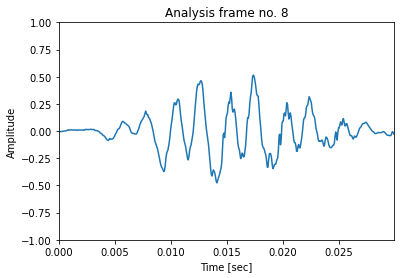

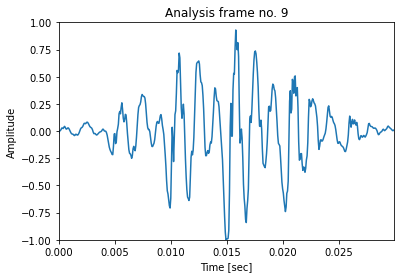

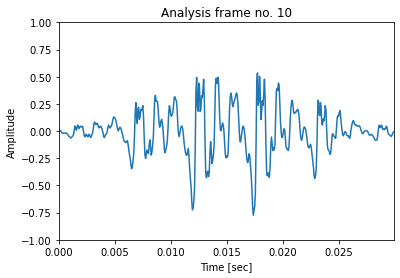

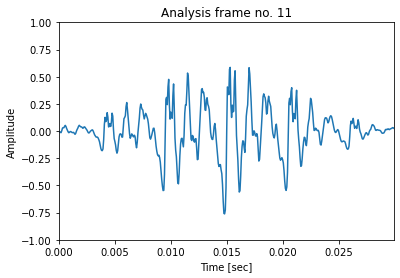

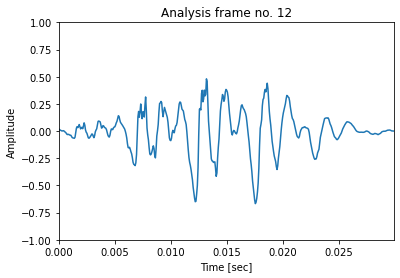

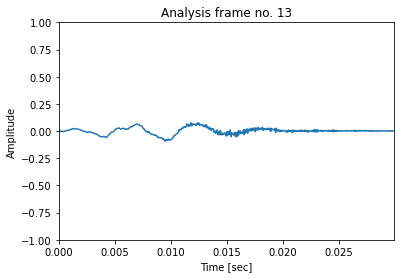

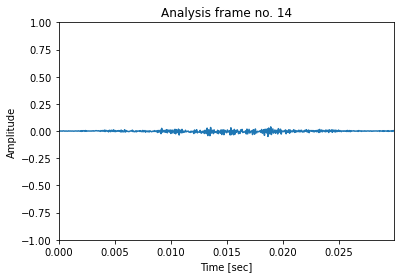

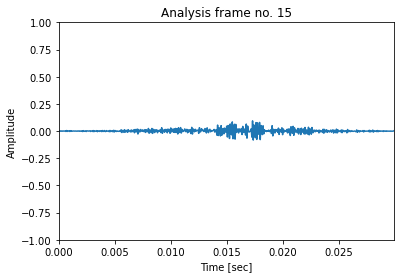

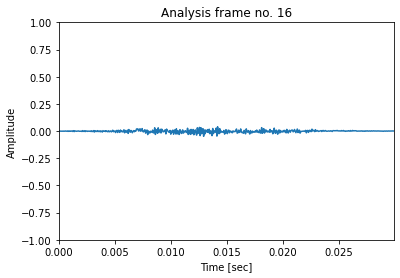

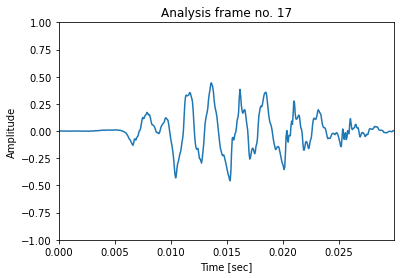

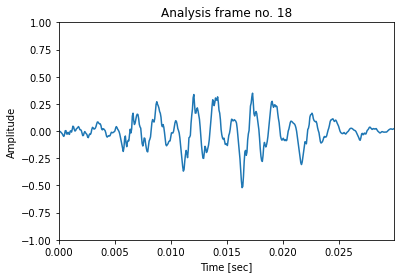

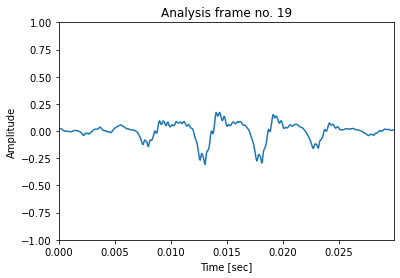

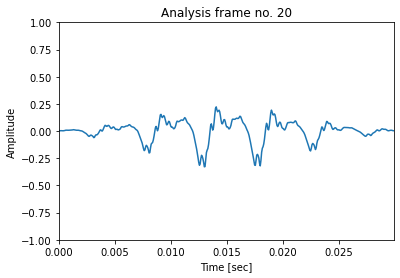

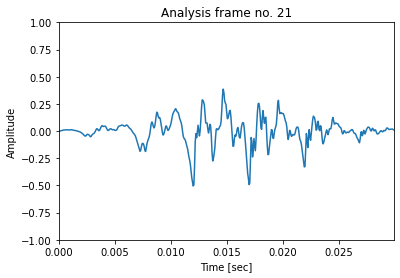

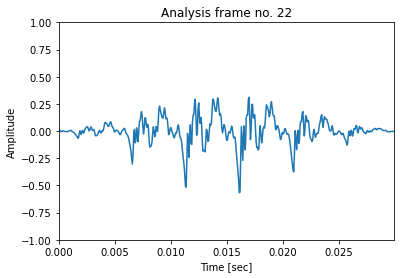

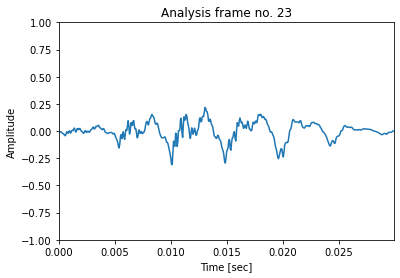

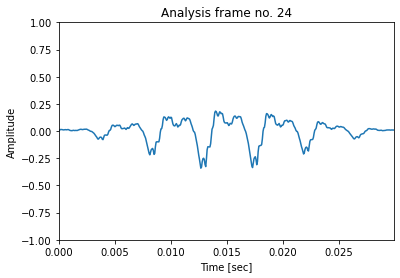

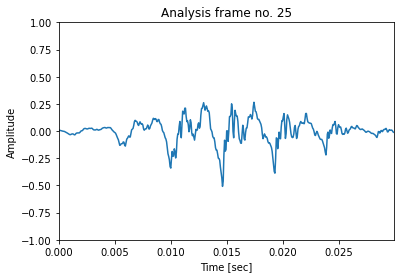

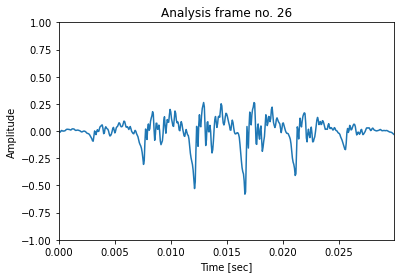

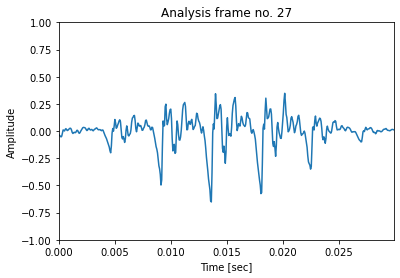

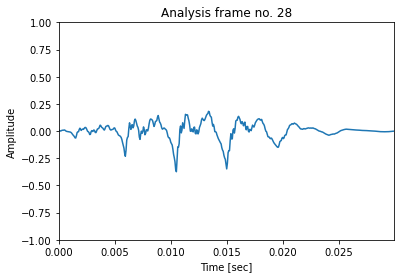

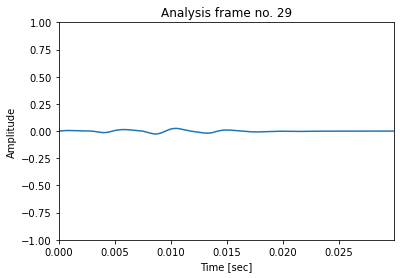

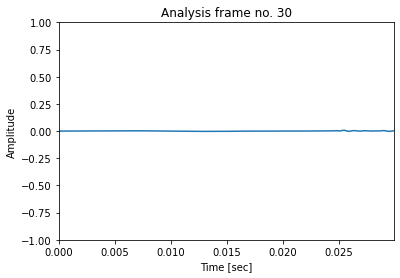

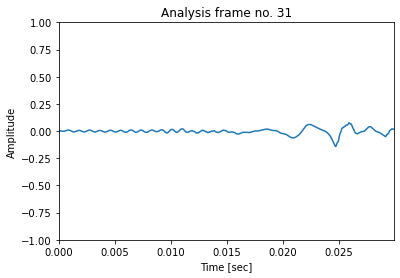

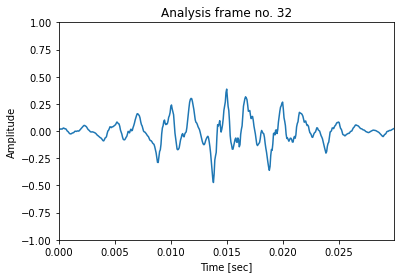

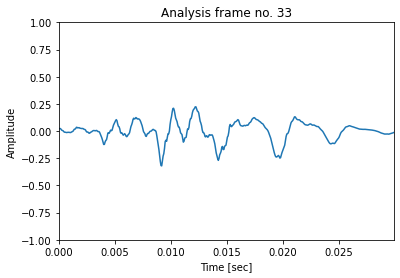

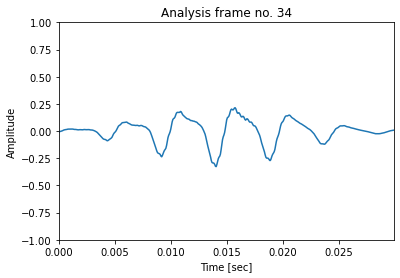

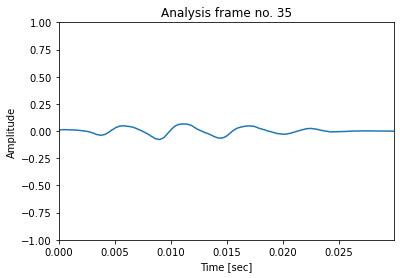

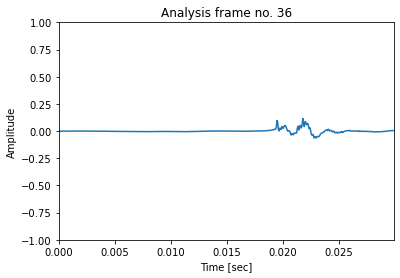

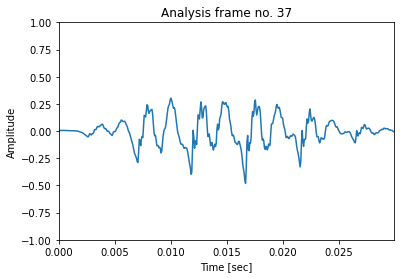

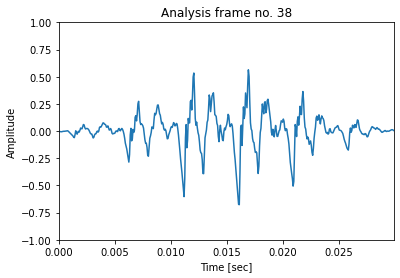

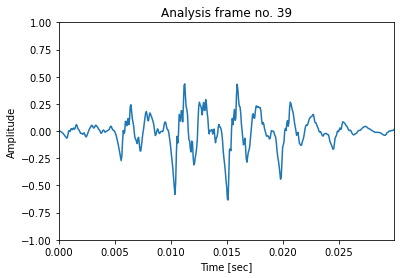

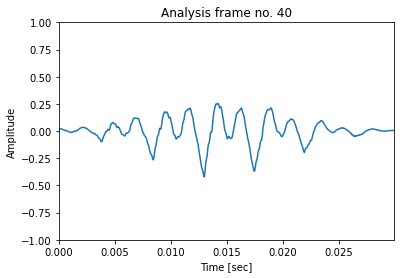

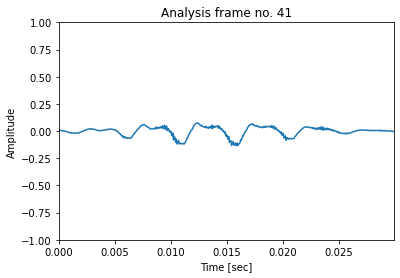

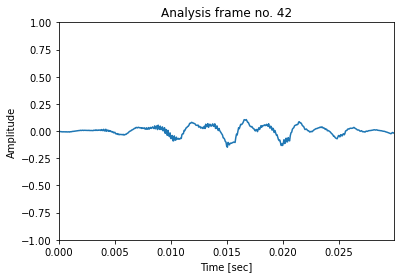

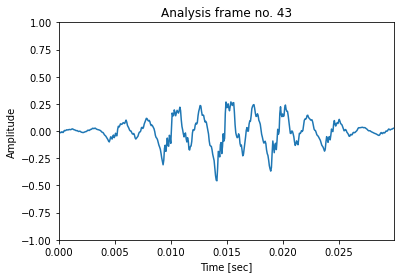

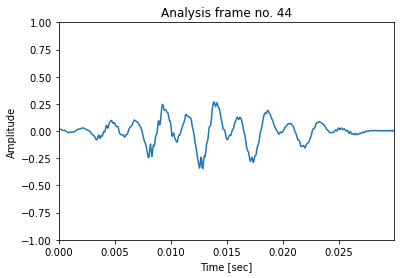

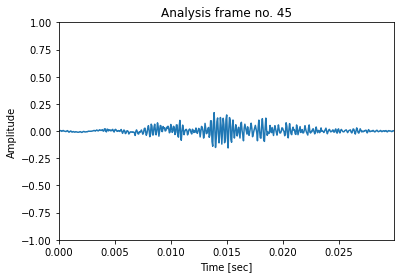

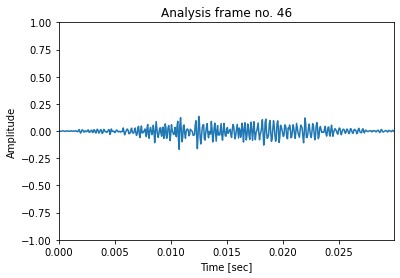

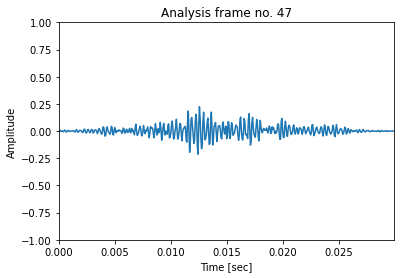

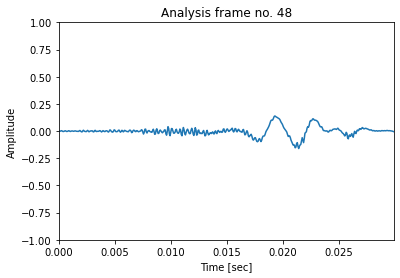

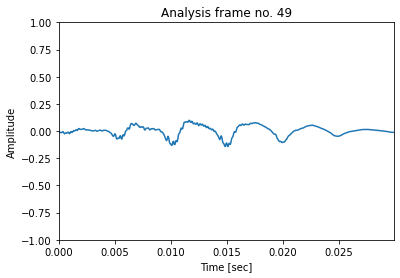

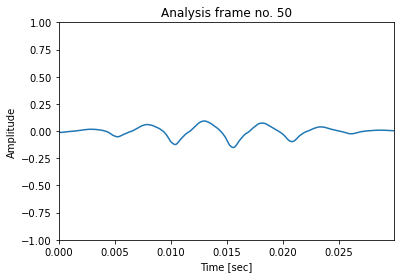

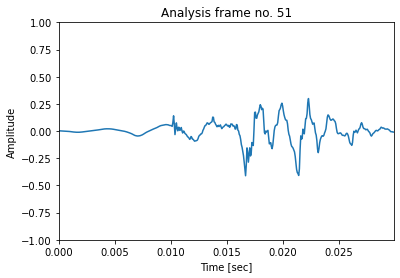

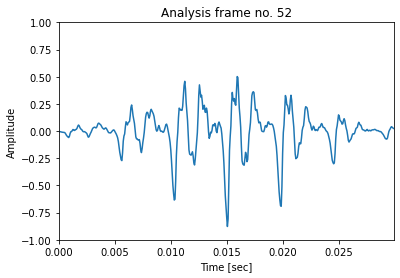

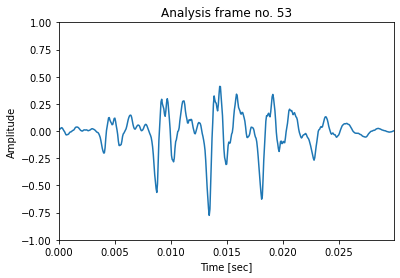

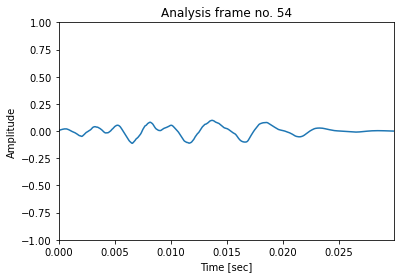

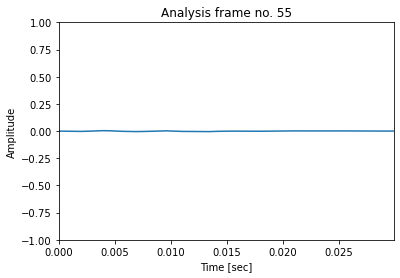

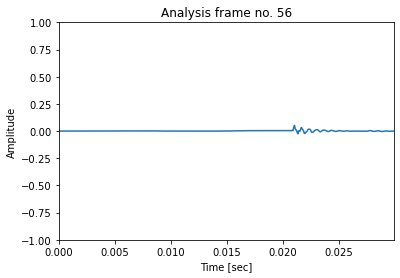

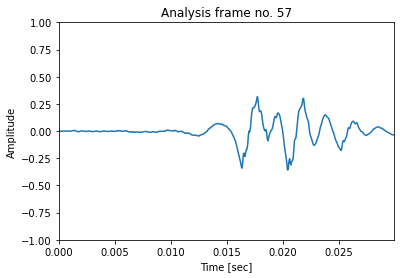

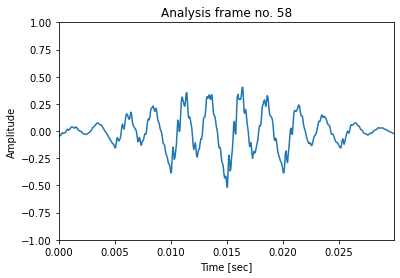

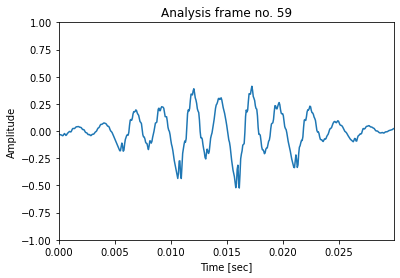

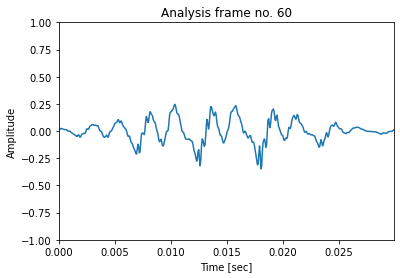

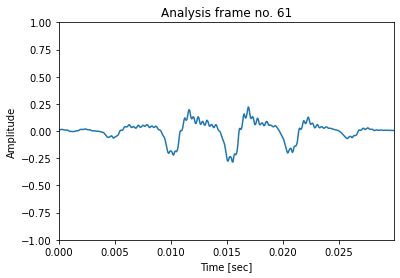

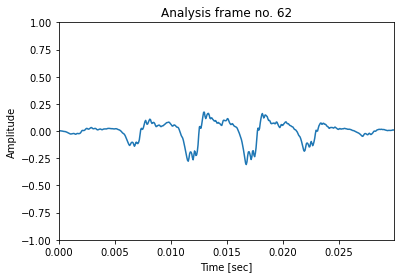

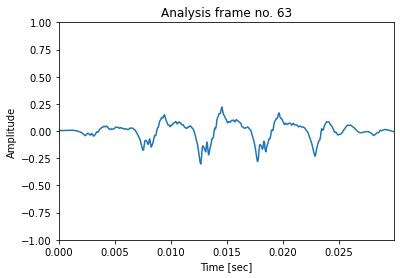

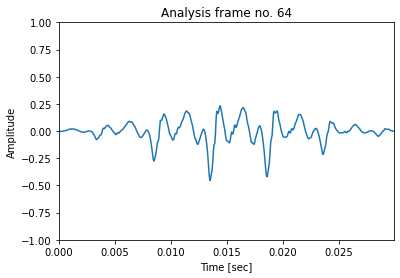

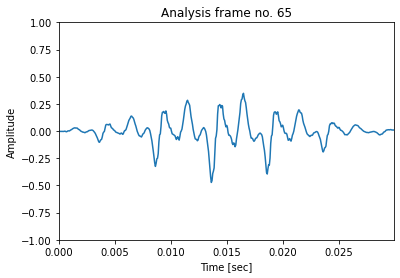

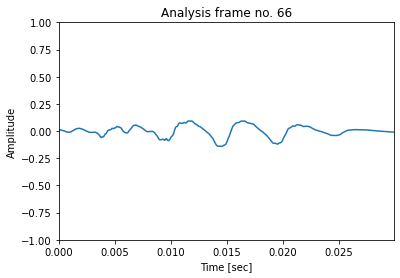

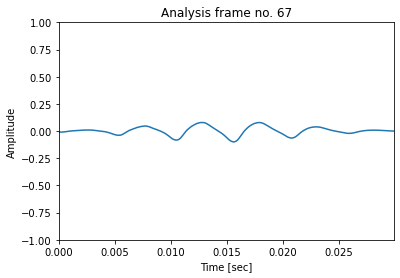

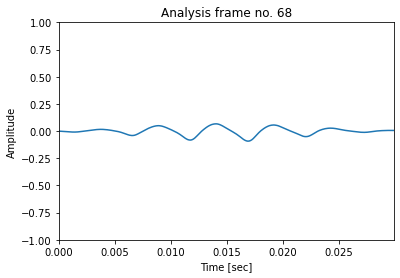

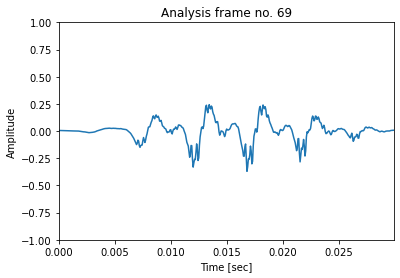

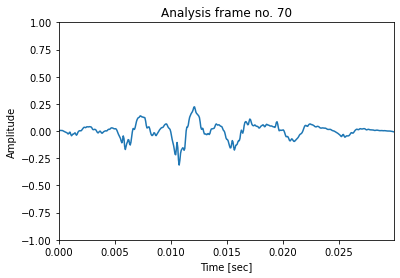

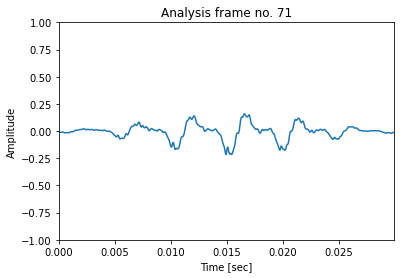

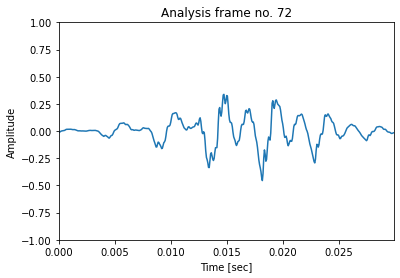

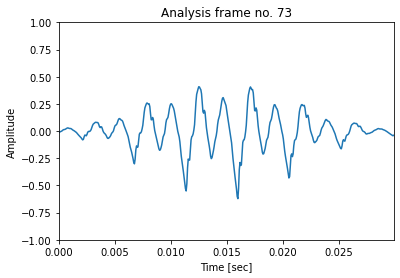

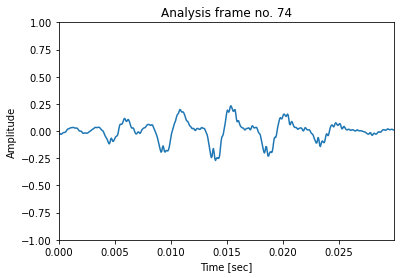

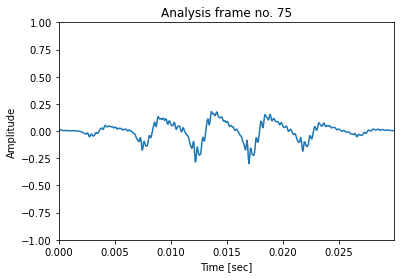

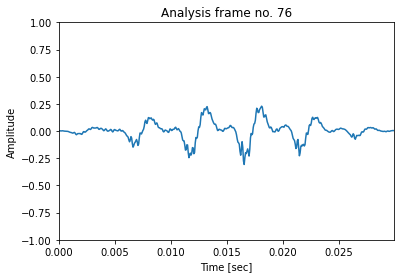

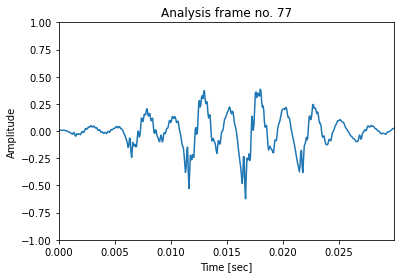

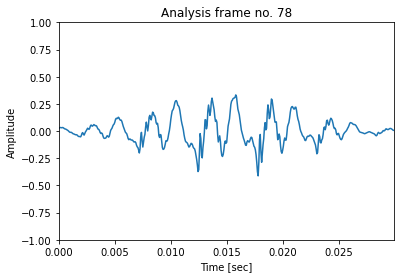

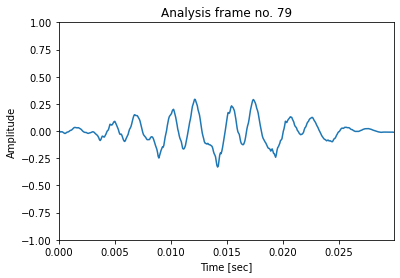

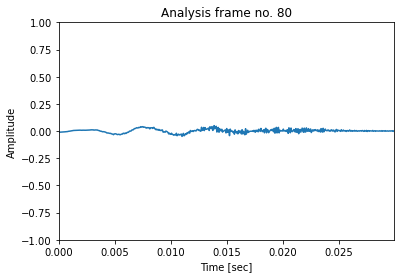

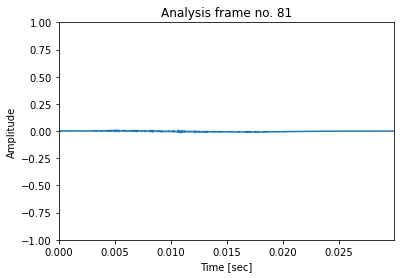

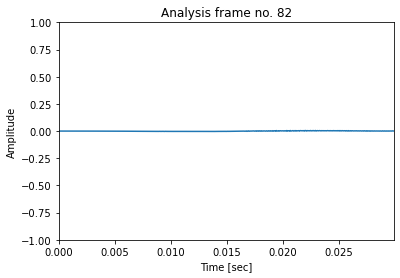

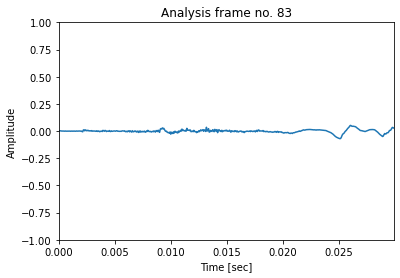

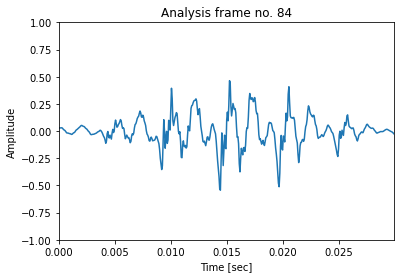

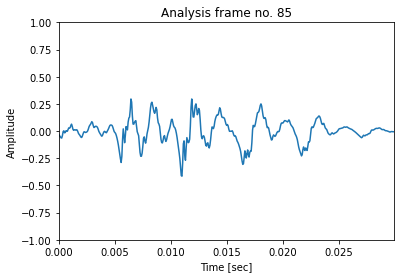

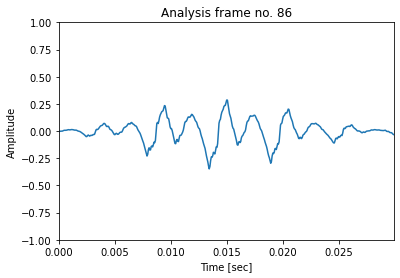

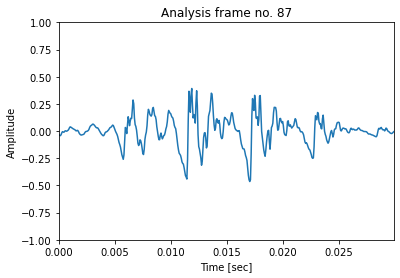

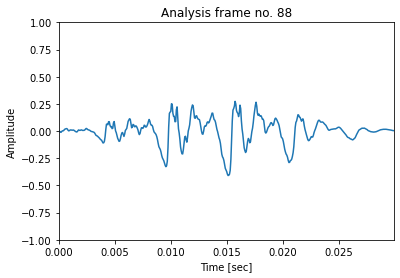

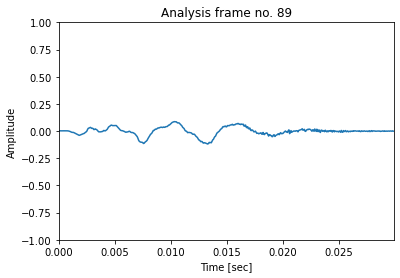

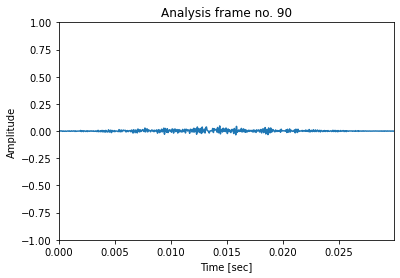

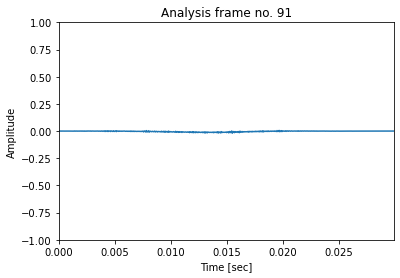

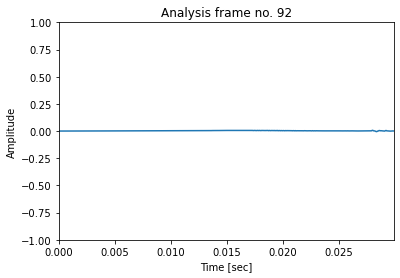

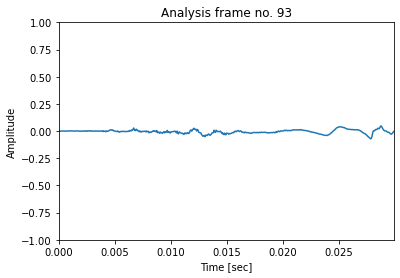

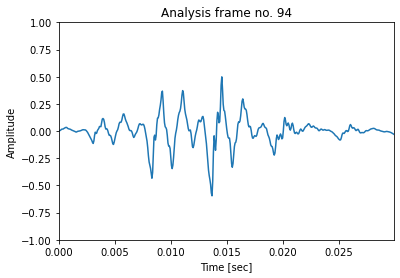

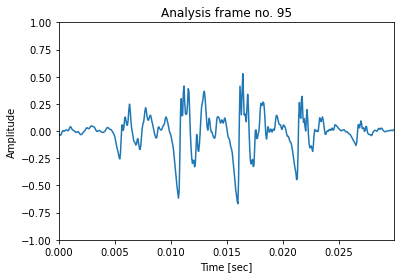

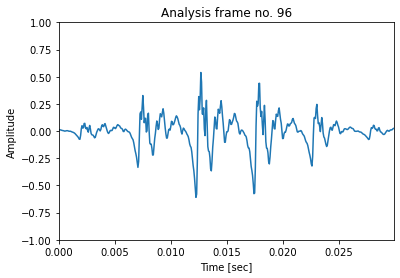

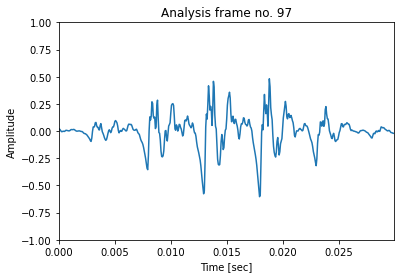

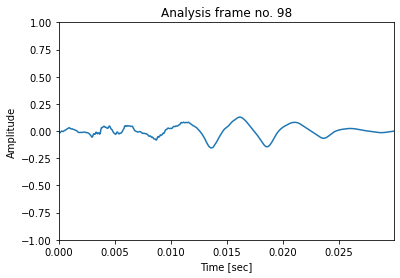

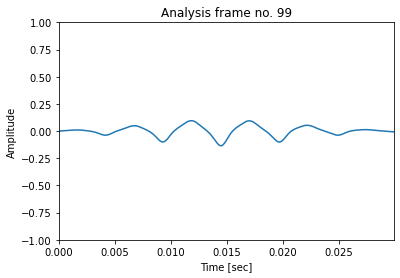

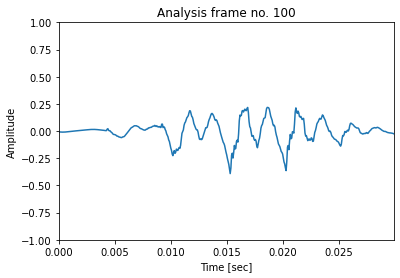

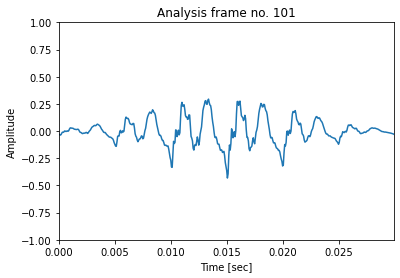

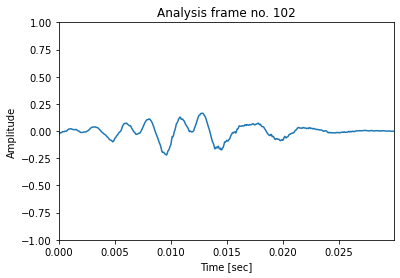

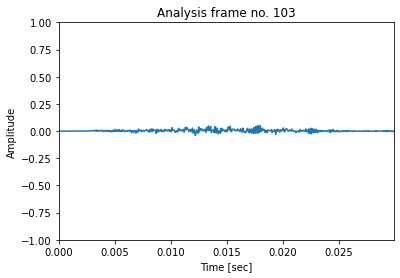

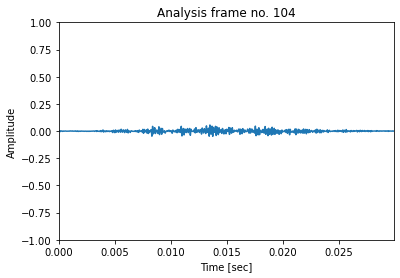

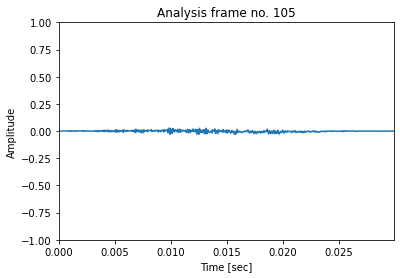

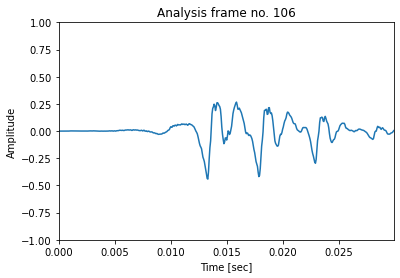

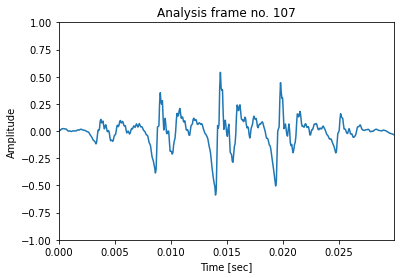

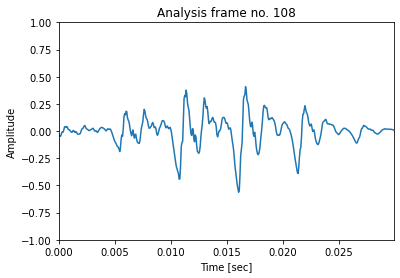

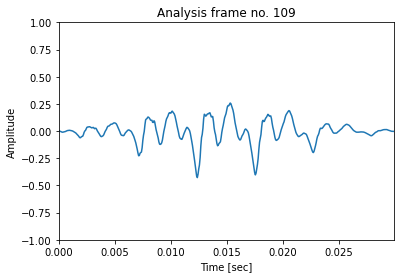

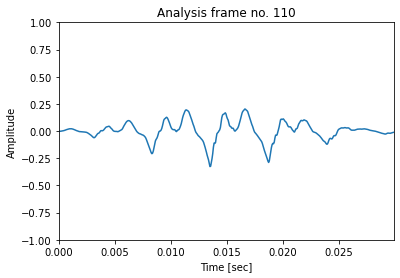

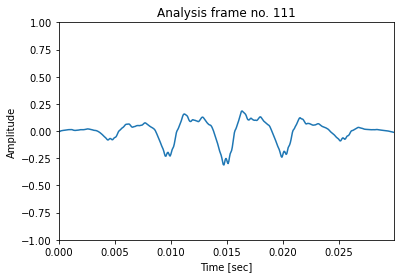

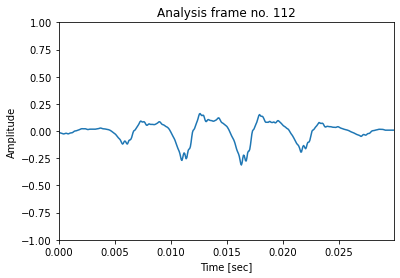

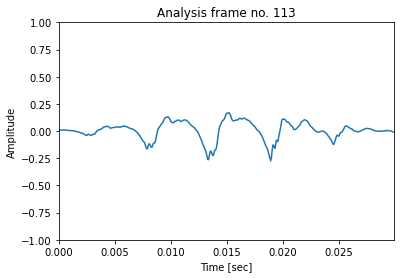

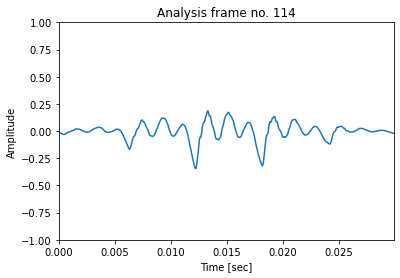

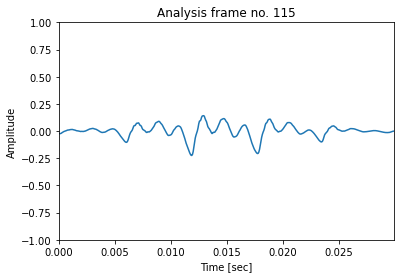

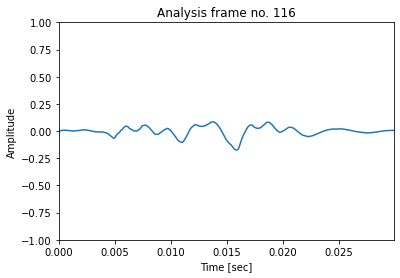

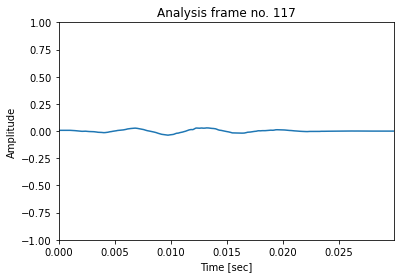

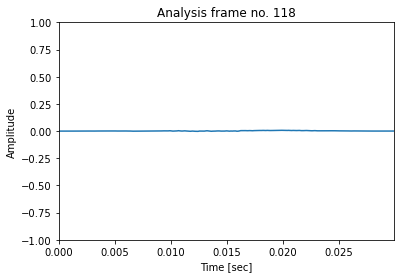

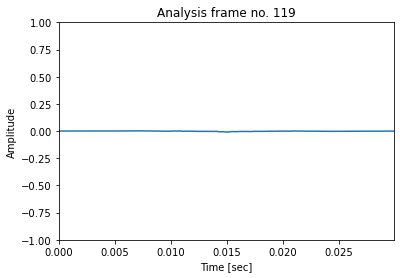

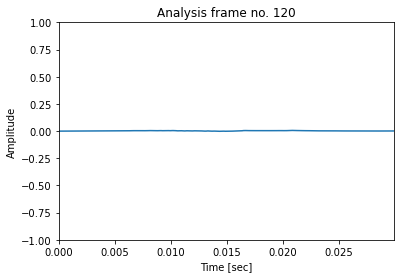

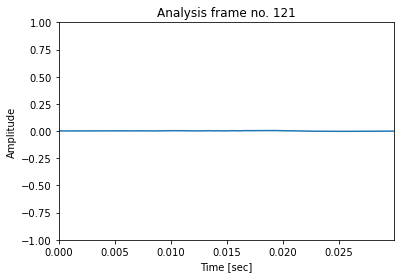

In [ ]:
# Creăm variabila de timp pentru axa oX a plotului
p=0

window_length = int(30*1e-3*sampling_frequency)
hamming_window = hamming(window_length)
number_of_frames = int(len(wav_data)/((1-p)*window_length))
for k in range(number_of_frames):
    # Extragem doar un cadru din semnal
    # Echivalent cu înmulțirea semnalului cu o fereastră rectangulară
    # cu o întârziere egală cu i*window_length
    current_frame = wav_data[k*window_length: (k+1)*window_length]
    hamming_frame = np.multiply(hamming_window, current_frame)
    # Plot
    time_axis = np.arange(0, window_length)*1.00/sampling_frequency
    pl.figure()
    pl.plot(time_axis, hamming_frame)
    pl.title("Analysis frame no. %d" %(k+1))
    pl.xlabel('Time [sec]')
    pl.ylabel('Amplitude')
    pl.xlim((0, time_axis[-1]))
    pl.ylim((-1, 1))

Afișați spectrograma semnalului.

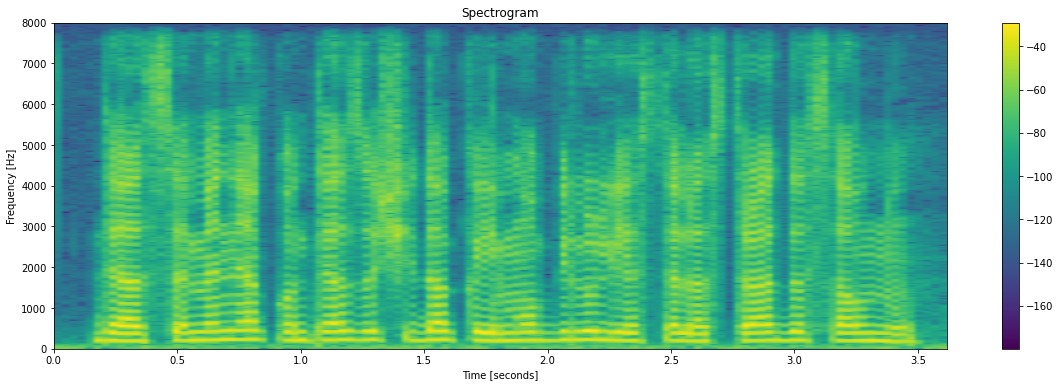

In [ ]:
# Plotăm spectrograma
pl.figure(figsize=(20,6))
pl.specgram(wav_data, NFFT=512, \
     Fs=sampling_frequency, noverlap=0, scale = 'dB')
pl.colorbar()
pl.title("Spectrogram")
pl.ylabel("Frequency [Hz]")
pl.xlabel("Time [seconds]");

Filtrați semnalul cu un filtru trece jos de tip Butterworh de ordin 4 și cu frecvența de tăiere de 400 Hz și reprezentați spectrograma semnalului filtrat. Comparați cu punctul (d) și comentați.

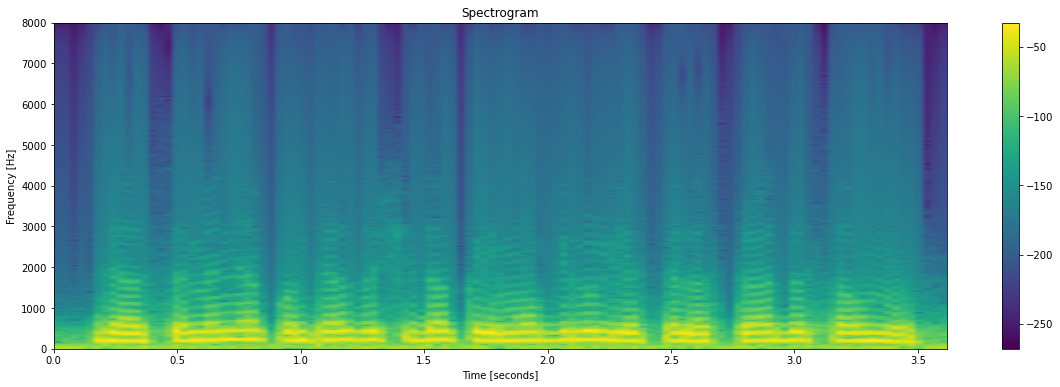

In [ ]:
# Proiect m un filtru trece jos cu frecvent,a de taiere
# la 400Hz
from scipy.signal import lfilter, butter
# Frecvent,a de t iere
cutoff = 400
# Ordinul filtrului
order = 5
# Frecvent,a Nyquist
nyq = 0.5 * sampling_frequency
# Normaliz m frecvent,a de t iere
normal_cutoff = cutoff / nyq
# Calcul m coeficient,ii unui filtru Butterworth de
# tip trece-jos
b, a = butter(order, normal_cutoff, btype='low', analog=False)
# Filtr m datele
filtered_data = lfilter(b, a, wav_data)

#daca am fi dorit sa afisam semnalul filtrat
#time_axis_filtered = np.arange(0, len(filtered_data)) *1.00/sampling_frequency
#pl.plot(time_axis_filtered, filtered_data)
#pl.title('Low-pass filtered signal')
#pl.xlim([0, time_axis_filtered[-1]])
#pl.ylim([-1, 1])
#pl.xlabel('Time [s]')
#pl.ylabel('Amplitude');


# Plotăm spectrograma
pl.figure(figsize=(20,6))
pl.specgram(filtered_data, NFFT=512,Fs=sampling_frequency, noverlap=0, scale = 'dB')
pl.colorbar()
pl.title("Spectrogram")
pl.ylabel("Frequency [Hz]")
pl.xlabel("Time [seconds]");

Vizualizați pentru fiecare cadru din semnalul original și din semnalul filtrat, semnalul pe cadre, respectiv spectrul FFT pe scală logaritmică și precizați ce observați.

In [ ]:
#fiecare cadru din semnalul original
window_length = int(30*1e-3*sampling_frequency)
number_of_frames = int(len(wav_data)/((1-p)*window_length))
for k in range(number_of_frames):
    # Extragem doar un cadru din semnal
    # Echivalent cu înmulțirea semnalului cu o fereastră rectangulară
    # cu o întârziere egală cu i*window_length
    current_frame = wav_data[k*window_length: (k+1)*window_length]
    # Plot
    time_axis = np.arange(0, window_length)*1.00/sampling_frequency
    pl.figure()
    pl.plot(time_axis, current_frame)
    pl.title("Analysis frame no. %d" %(k+1))
    pl.xlabel('Time [sec]')
    pl.ylabel('Amplitude')
    pl.xlim((0, time_axis[-1]))
    pl.ylim((-1, 1))
    
    
    


In [ ]:
#fiecare cadru din semnalul filtrat
number_of_frames2 = int(len(filtered_data)/((1-p)*window_length))
for k in range(number_of_frames2):
    current_frame = wav_data[k*window_length: (k+1)*window_length]
    # Plot
    time_axis = np.arange(0, window_length)*1.00/sampling_frequency
    pl.figure()
    pl.plot(time_axis, current_frame)
    pl.title("Analysis frame no. %d" %(k+1))
    pl.xlabel('Time [sec]')
    pl.ylabel('Amplitude')
    pl.xlim((0, time_axis[-1]))
    pl.ylim((-1, 1))

In [ ]:
#spectru fft pe scara log semnal
#fiecare cadru din semnalul original
window_length = int(30*1e-3*sampling_frequency)
number_of_frames = int(len(wav_data)/((1-p)*window_length))
for k in range(number_of_frames):

    pl.figure(figsize=(15,20))

    # Primul sample
    pl.subplot(3,2,3)
    pl.magnitude_spectrum(current_frame, \
                Fs = sampling_frequency, scale = 'dB')
    pl.title ("Log magnitude spectrum ")

    pl.subplot(3,2,5)
    A = pl.phase_spectrum(current_frame, \
                Fs = sampling_frequency)
    pl.title ("Phase spectrum ")